In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
raw_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df = raw_data.copy()

## Data Exploration

In [7]:
def dist_plots(col):
    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    sns.distplot(df[col])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.tight_layout()
    
def mean_last_five_first_five(col):
    print('Mean value: ', df[col].mean(), '\n')
    print(df[col].sort_values(ascending=False)[:5])
    print(df[col].sort_values()[:5])
    
def count_plots(col):
    plt.figure(figsize=(12, 4))
    sns.countplot(df[col])
    plt.tight_layout()

## Univariate Analysis

### Bank Client Data

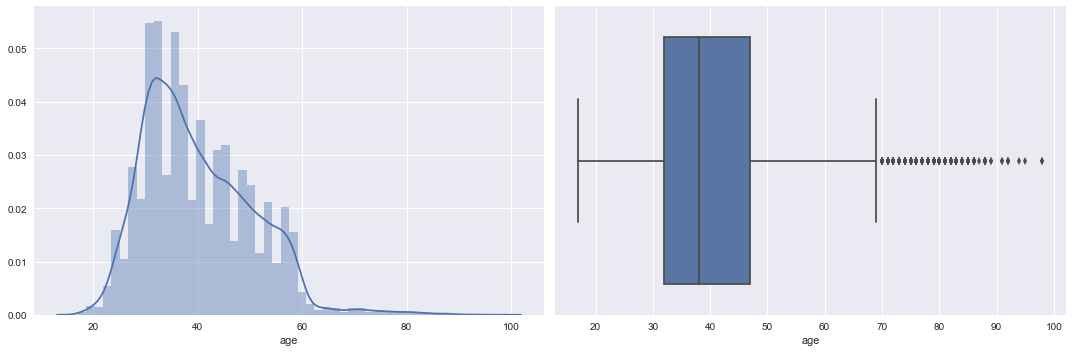

In [8]:
dist_plots('age')

In [9]:
mean_last_five_first_five('age')

Mean value:  40.02406040594348 

38452    98
38455    98
27826    95
38921    94
40450    92
Name: age, dtype: int64
38274    17
37579    17
37539    17
37140    17
37558    17
Name: age, dtype: int64


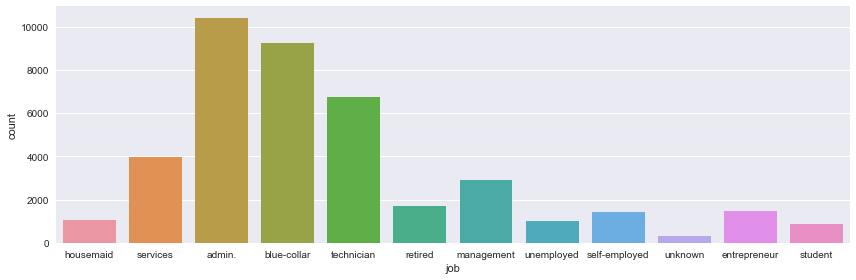

In [10]:
# type of job
count_plots('job')

In [11]:
pd.crosstab(df['job'], df['y'], normalize='index')

y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


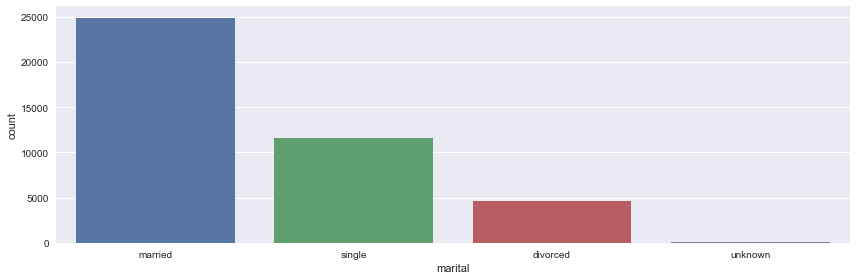

In [12]:
# marital status
count_plots('marital')

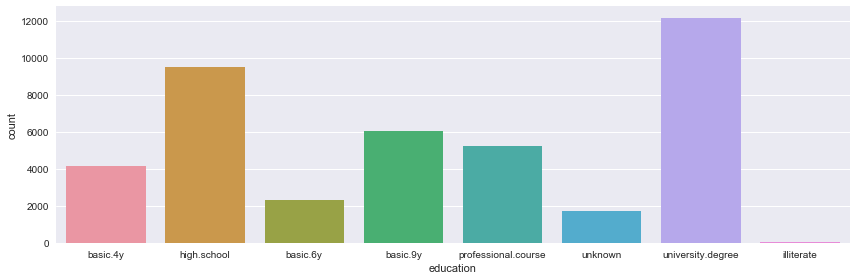

In [13]:
# education level
count_plots('education')

In [14]:
pd.crosstab(df['education'], df['y'], normalize='columns')

y,no,yes
education,,
basic.4y,0.102550,0.092241
basic.6y,0.057568,0.040517
basic.9y,0.152457,0.101940
high.school,0.232133,0.222198
illiterate,0.000383,0.000862
professional.course,0.127175,0.128233
university.degree,0.287239,0.359914
unknown,0.040495,0.054095


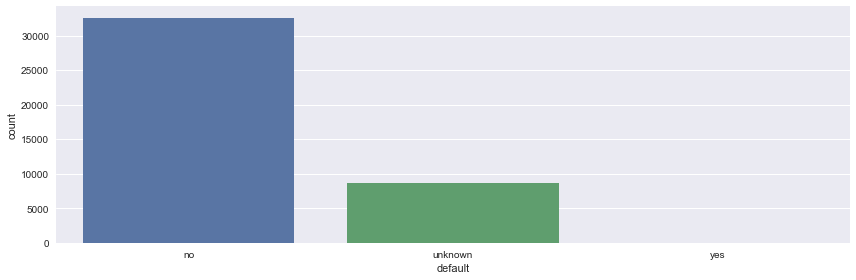

In [15]:
# has credit in default
count_plots('default')

In [16]:
pd.crosstab(df['default'], df['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


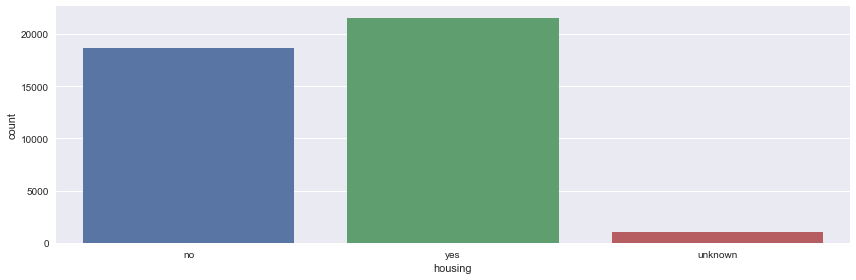

In [17]:
# has housing loan?
count_plots('housing')

In [18]:
pd.crosstab(df['housing'], df['y'])

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


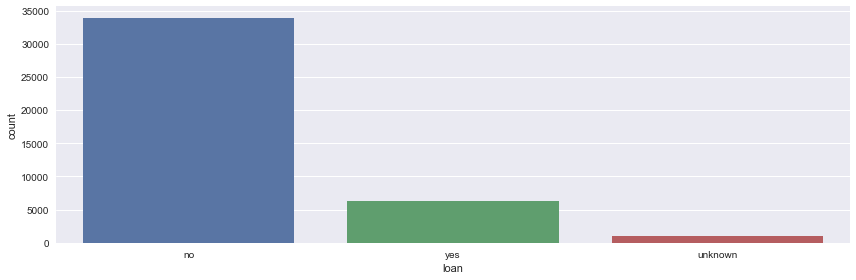

In [19]:
# has personal loan?
count_plots('loan')

In [20]:
pd.crosstab(df['loan'], df['y'])

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


### Related with Last Contact of Current Campaign

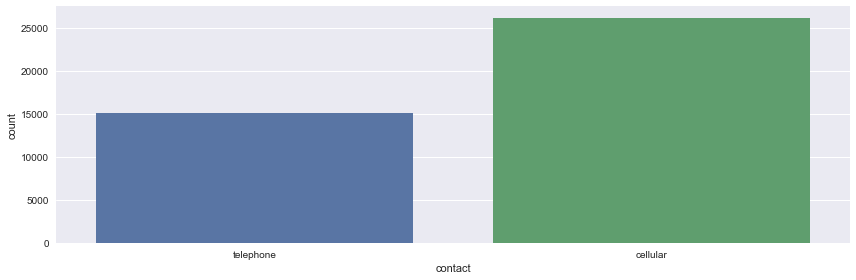

In [21]:
# contact communication type
count_plots('contact')

In [22]:
pd.crosstab(df['contact'], df['y'], normalize='columns')

y,no,yes
contact,,
cellular,0.60991,0.830388
telephone,0.39009,0.169612


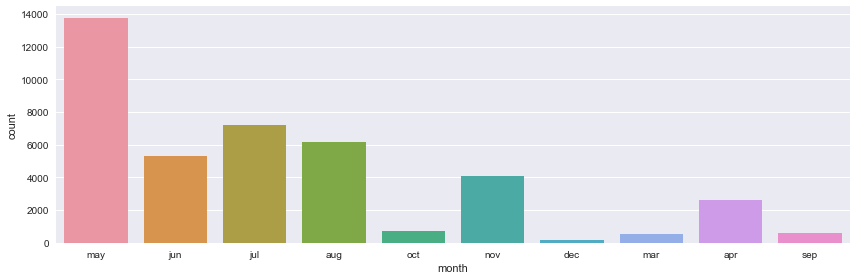

In [23]:
count_plots('month')

In [24]:
pd.crosstab(df['month'], df['y'], normalize='columns')

y,no,yes
month,,
apr,0.057267,0.116164
aug,0.151116,0.141164
dec,0.002545,0.019181
jul,0.178532,0.139871
jun,0.130212,0.120474
mar,0.007388,0.059483
may,0.352495,0.190948
nov,0.100826,0.089655
oct,0.011027,0.067888


In [25]:
df['month'].value_counts()
# no values for january or february

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

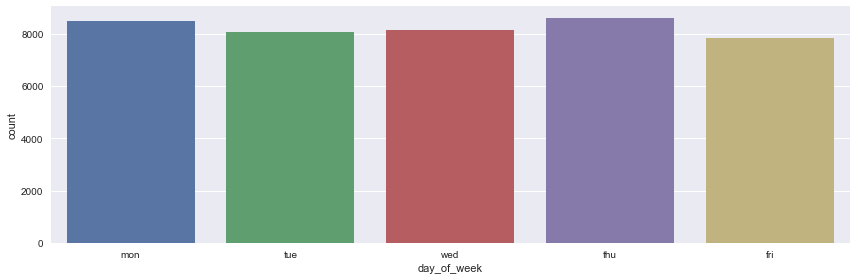

In [26]:
count_plots('day_of_week')

In [27]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [28]:
pd.crosstab(df['day_of_week'], df['y'])

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


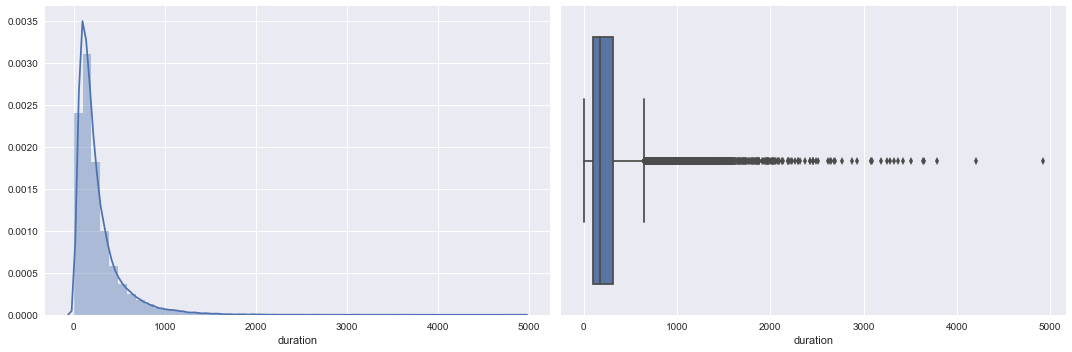

In [29]:
# duration of contact in seconds
dist_plots('duration')

In [30]:
mean_last_five_first_five('duration')

Mean value:  258.2850101971448 

24091    4918
22192    4199
40537    3785
13820    3643
7727     3631
Name: duration, dtype: int64
33015    0
23031    0
28063    0
6251     0
28239    1
Name: duration, dtype: int64


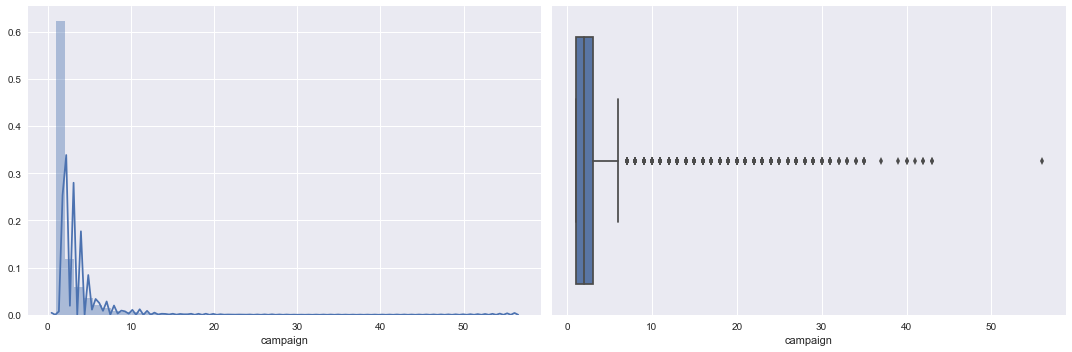

In [31]:
# number of contacts performed during this campaign and for this client
dist_plots('campaign')

In [32]:
mean_last_five_first_five('campaign')

Mean value:  2.567592502670681 

4107     56
18728    43
13447    43
5304     42
4168     42
Name: campaign, dtype: int64
0        1
30141    1
30142    1
30143    1
30144    1
Name: campaign, dtype: int64


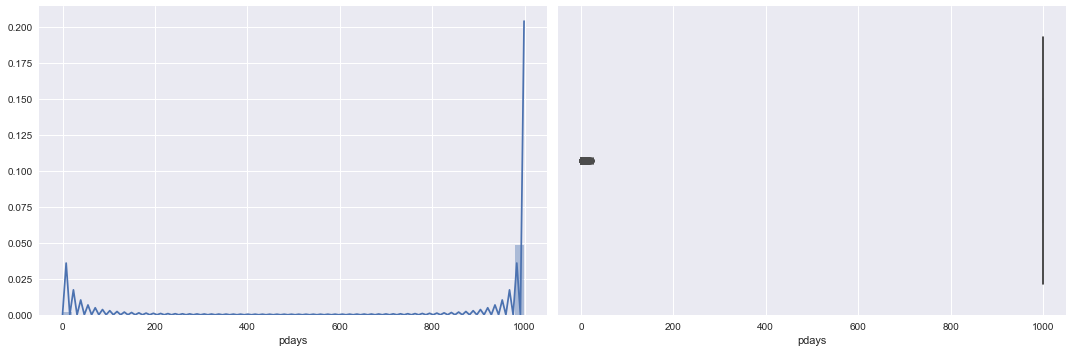

In [33]:
# number of days that passed by after the client was last contacted from
# a previous campaign
dist_plots('pdays')

In [34]:
# note: 999 means client was not previously contacted
mean_last_five_first_five('pdays')

Mean value:  962.4754540157328 

41187    999
13675    999
13733    999
13732    999
13731    999
Name: pdays, dtype: int64
40534    0
40376    0
30417    0
30314    0
40382    0
Name: pdays, dtype: int64


In [35]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

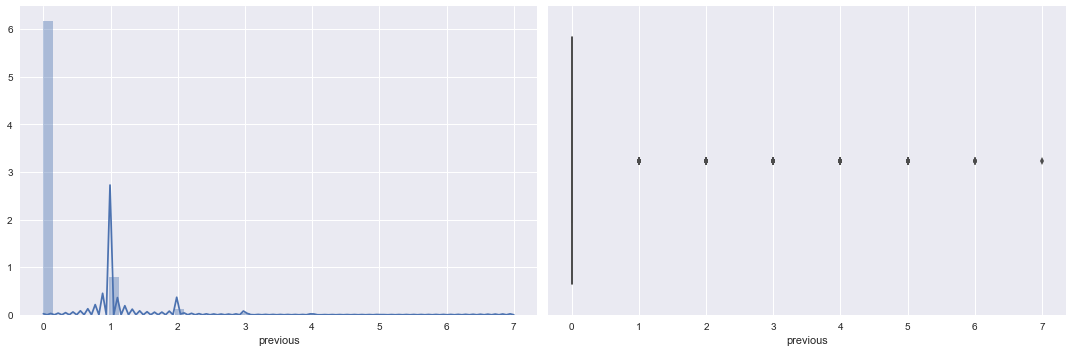

In [36]:
# number of contacts performed before this campaign and for this client
dist_plots('previous')

In [37]:
mean_last_five_first_five('previous')

Mean value:  0.17296299893172767 

41081    7
41090    6
40395    6
40436    6
40421    6
Name: previous, dtype: int64
0        0
23717    0
23716    0
23715    0
23714    0
Name: previous, dtype: int64


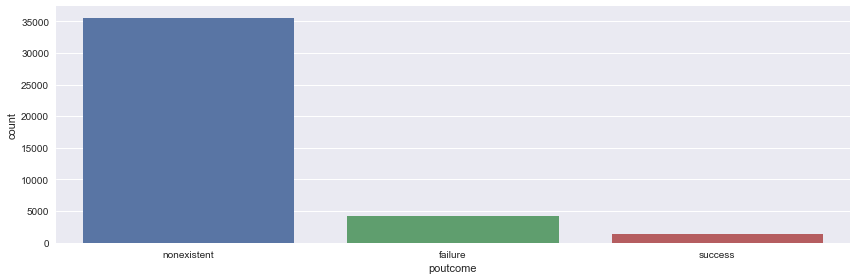

In [38]:
# outcome of the previous marketing campaign
count_plots('poutcome')

In [39]:
pd.crosstab(df['poutcome'], df['y'])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


### Social and Economic context attributes

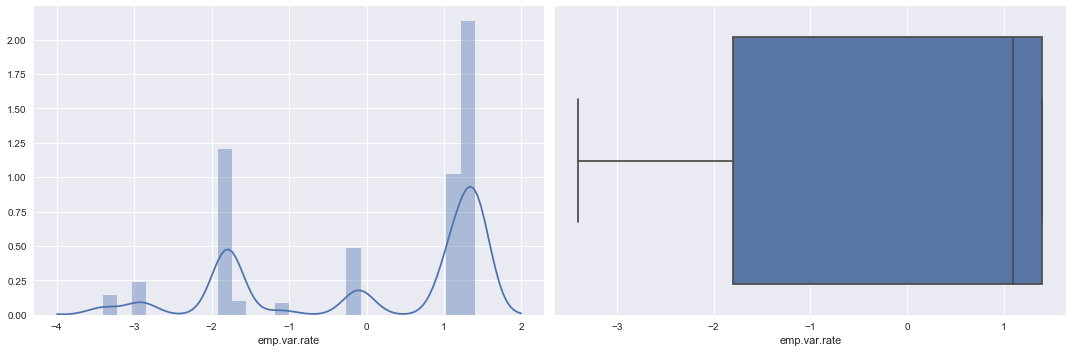

In [40]:
# employment variation rate - quarterly indicator
dist_plots('emp.var.rate')

In [41]:
mean_last_five_first_five('emp.var.rate')

Mean value:  0.0818855006319146 

20593    1.4
15993    1.4
16002    1.4
16001    1.4
16000    1.4
Name: emp.var.rate, dtype: float64
38490   -3.4
38251   -3.4
38250   -3.4
38249   -3.4
38248   -3.4
Name: emp.var.rate, dtype: float64


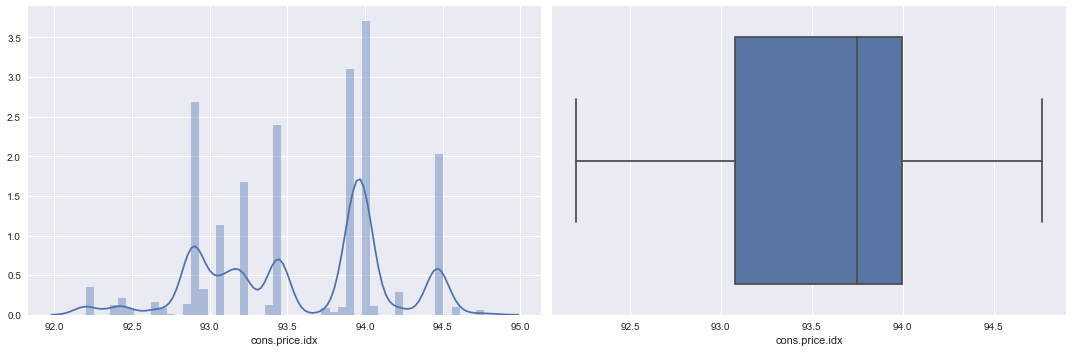

In [42]:
# consumer price index - monthly indicator
# an index of the variation in prices paid by typical consumers 
# for retail goods and other items
dist_plots('cons.price.idx')

In [43]:
mean_last_five_first_five('cons.price.idx')

Mean value:  93.57566436831263 

41187    94.767
41122    94.767
41092    94.767
41093    94.767
41094    94.767
Name: cons.price.idx, dtype: float64
37681    92.201
37624    92.201
37625    92.201
37626    92.201
37627    92.201
Name: cons.price.idx, dtype: float64


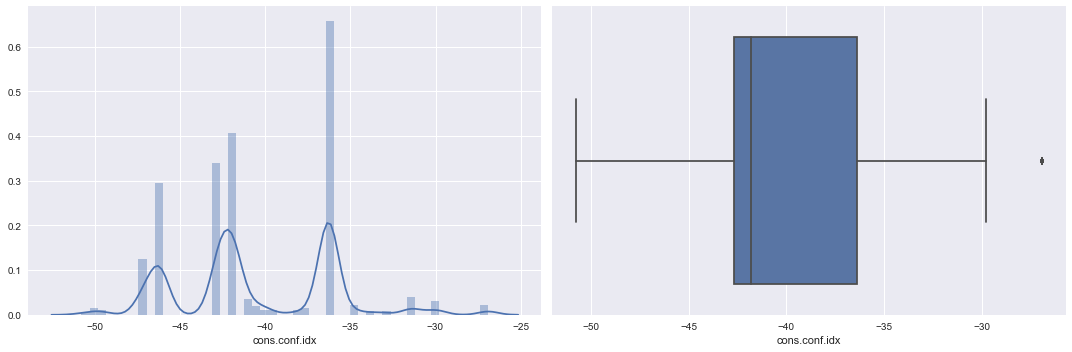

In [44]:
# consumer confidence index - monthly indicator
# the degree of optimism on the state of the economy that consumers 
# are expressing through their activities of savings and spending
dist_plots('cons.conf.idx')

In [45]:
mean_last_five_first_five('cons.conf.idx')

Mean value:  -40.50260027191399 

38580   -26.9
38377   -26.9
38295   -26.9
38296   -26.9
38297   -26.9
Name: cons.conf.idx, dtype: float64
41187   -50.8
41093   -50.8
41094   -50.8
41095   -50.8
41096   -50.8
Name: cons.conf.idx, dtype: float64


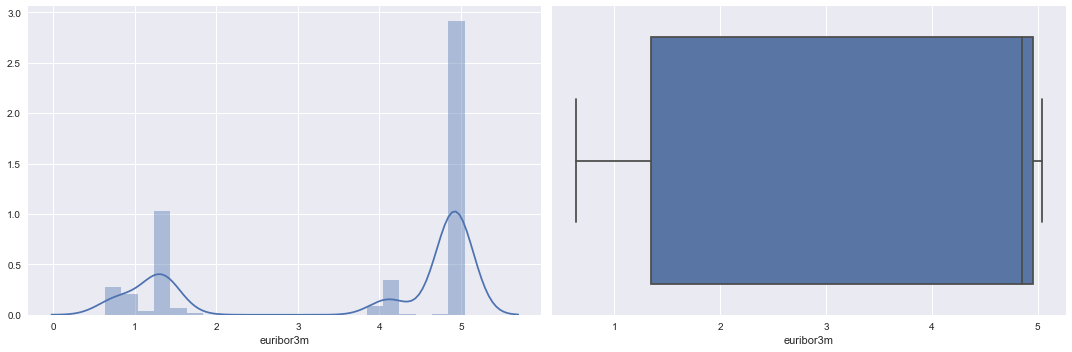

In [46]:
# Euribor 3 month rate
# based on the interest rates at which a a panel of European banks borrow funds 
# from one another.
dist_plots('euribor3m')

In [47]:
mean_last_five_first_five('euribor3m')

Mean value:  3.621290812858068 

23997    5.045
23998    5.045
23999    5.045
24000    5.045
24001    5.045
Name: euribor3m, dtype: float64
39388    0.634
39389    0.634
39390    0.634
39391    0.634
39392    0.634
Name: euribor3m, dtype: float64


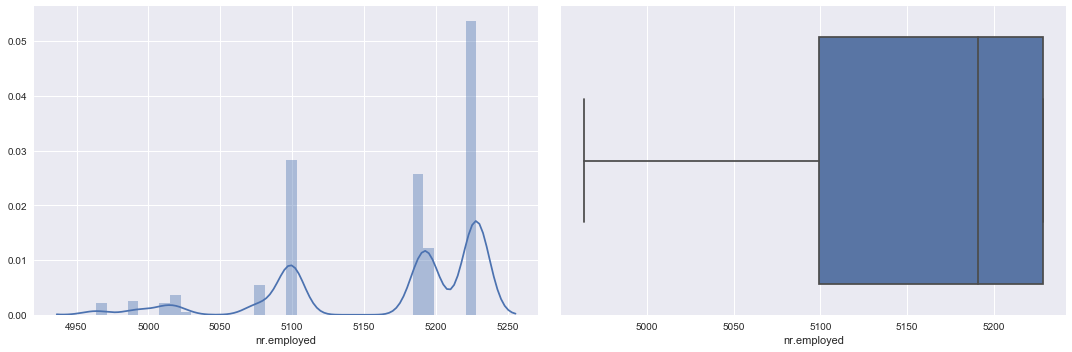

In [48]:
# number of employees
dist_plots('nr.employed')

In [49]:
mean_last_five_first_five('nr.employed')

Mean value:  5167.035910941844 

20593    5228.1
21510    5228.1
21501    5228.1
21502    5228.1
21503    5228.1
Name: nr.employed, dtype: float64
41187    4963.6
40766    4963.6
40765    4963.6
40764    4963.6
40763    4963.6
Name: nr.employed, dtype: float64


### Outcome Variable

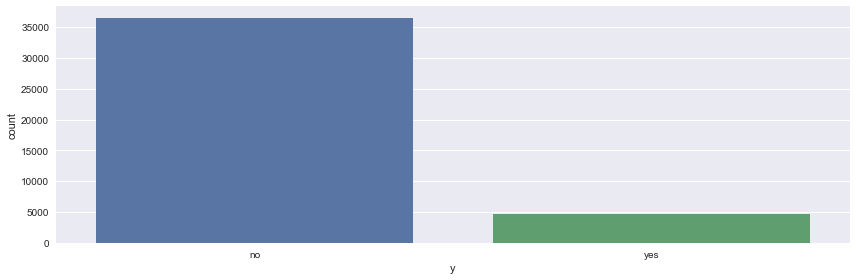

In [50]:
# does the client subscribe for a term deposit?
count_plots('y')

In [51]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Bivariate Analysis

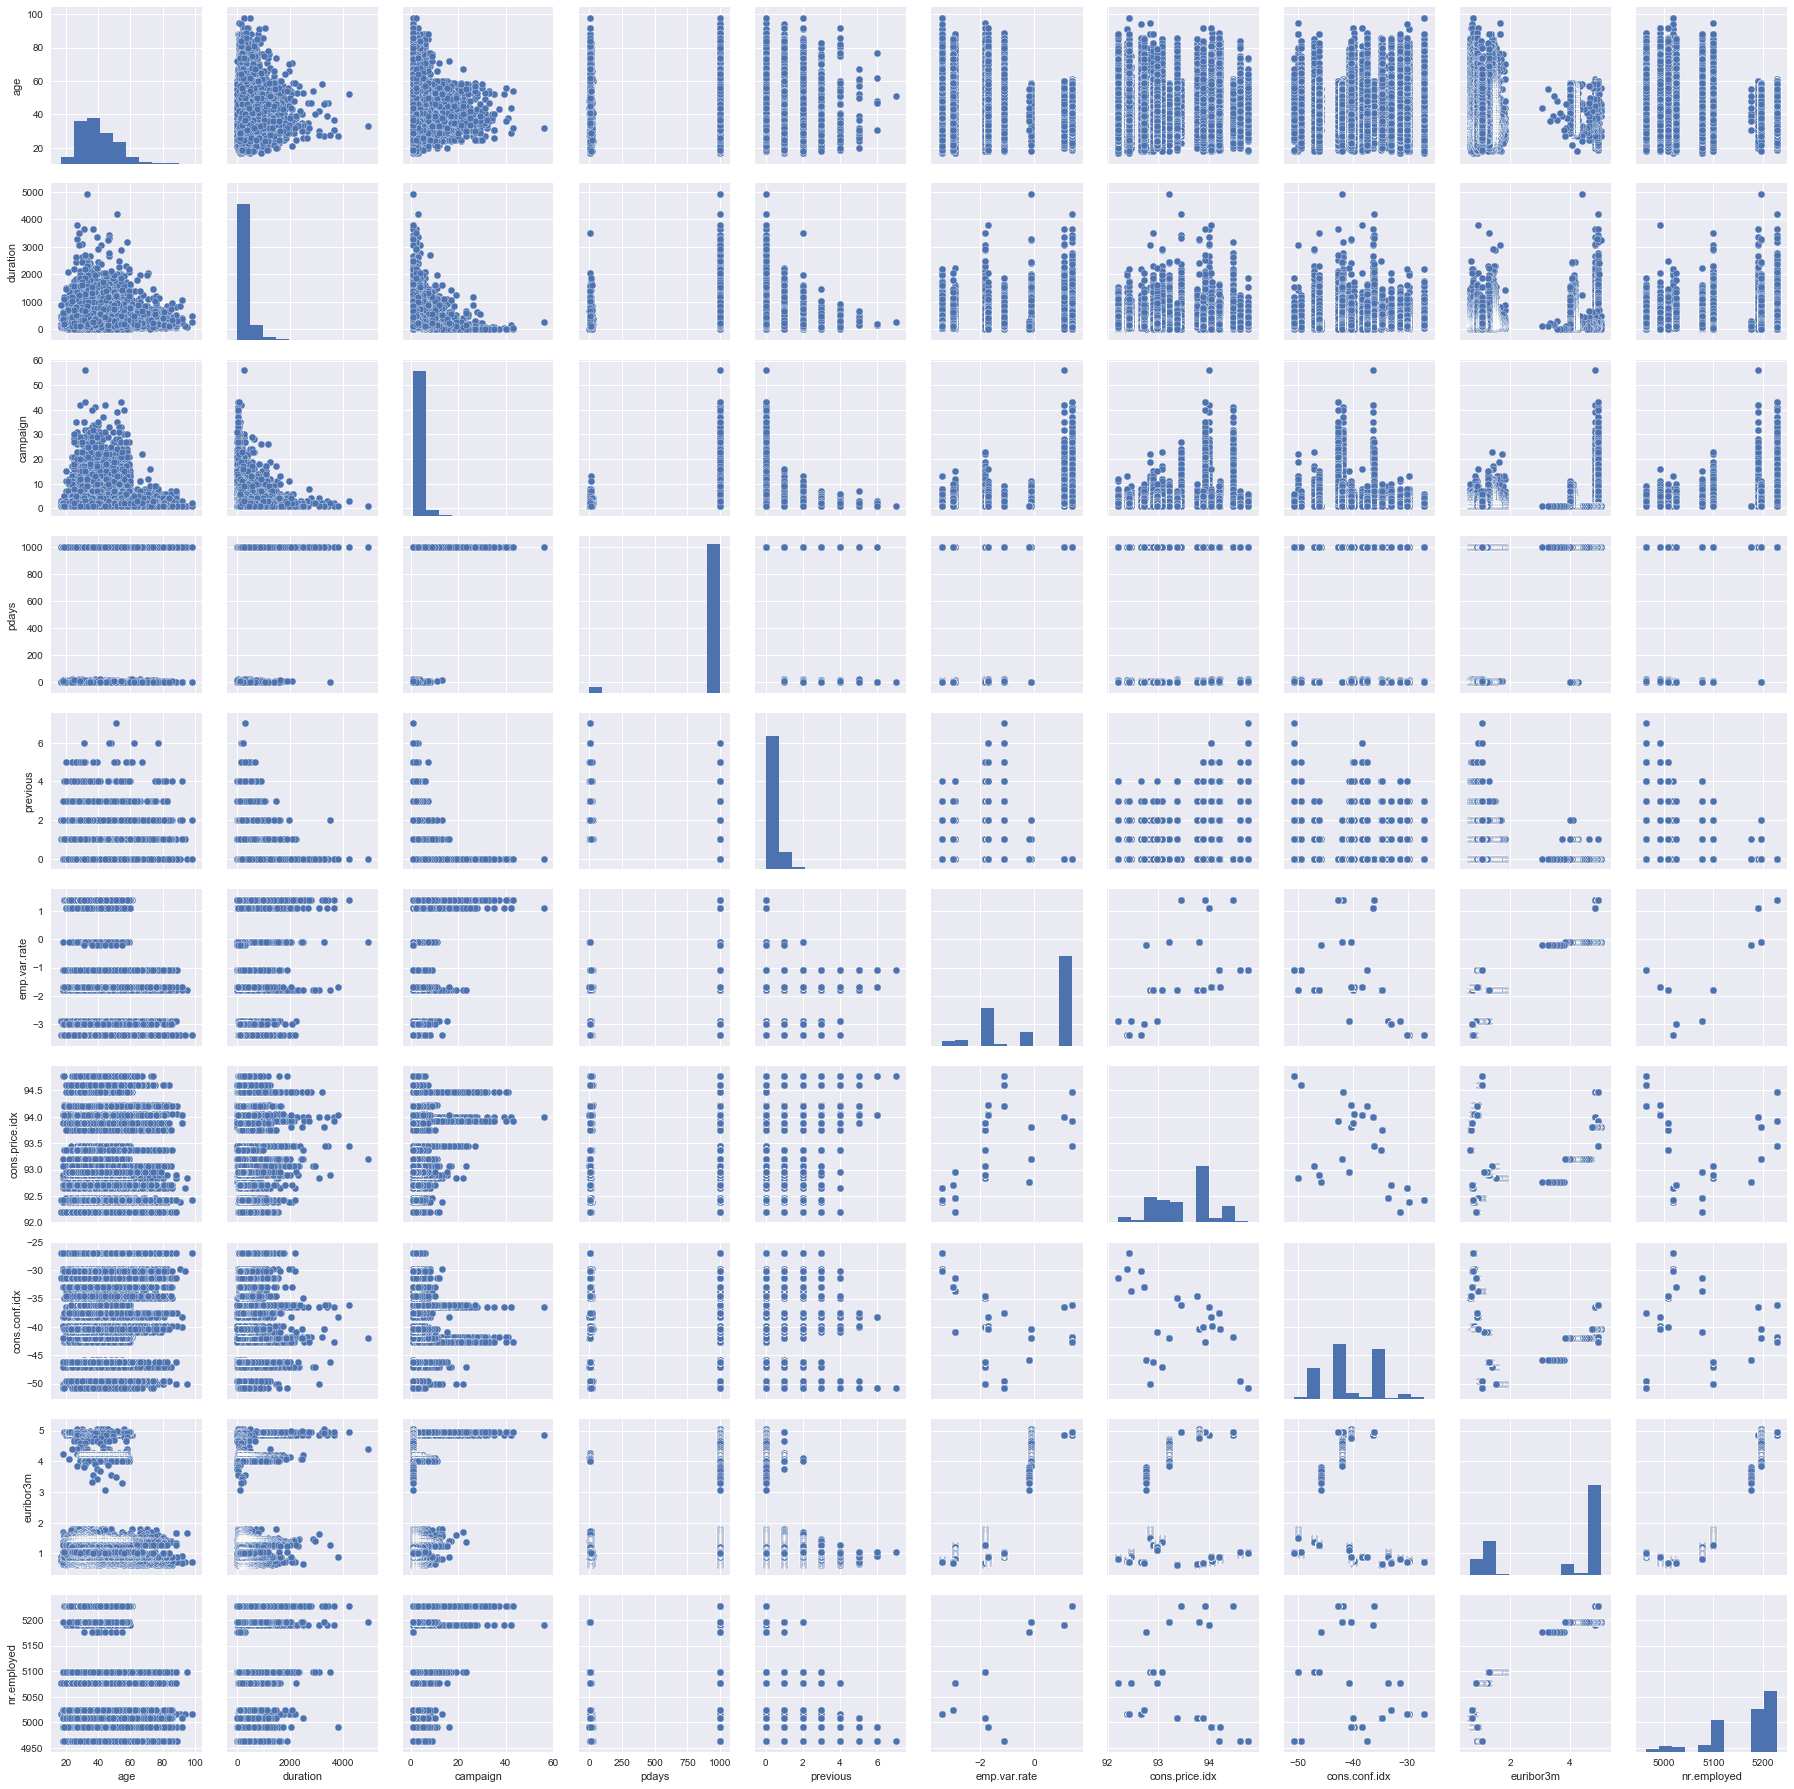

In [52]:
sns.pairplot(df)

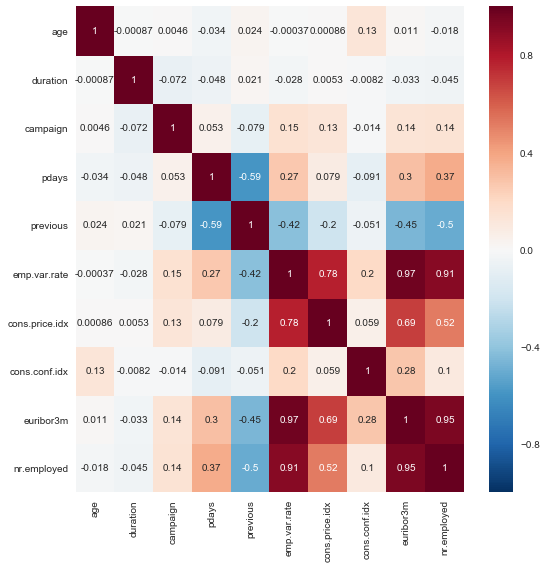

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

Very Strong Positive Correlations:
- euribor 3 month rate and employee variation rate
- number of employees and employee variation rate
- number of employees and euribor 3 month rate

Strong Positive Correlations:
- Consumer price index and employee variation rate
- Consumer price index and euribor 3 month rate

Notable Positive Correlations:
- number of employees and consumer price index

Notable Weak Correlations
- pdays and previous
- number of employees and previous

In [54]:
# convert outcome variable to numeric
df['y'] = pd.get_dummies(df['y'], drop_first=True)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
for item in ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    le.fit(df[item])
    df[item] = le.transform(df[item])

In [58]:
df.drop('euribor3m', axis=1, inplace=True)

In [59]:
df.drop('nr.employed', axis=1, inplace=True)

In [60]:
df.drop('cons.price.idx', axis=1, inplace=True)

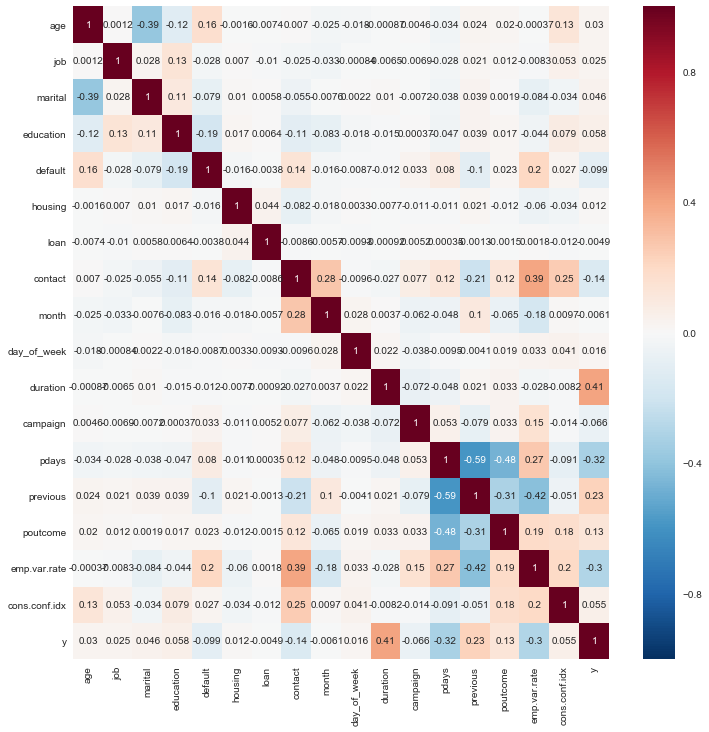

In [61]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

## Model Selection

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [243]:
rfc = RandomForestClassifier(random_state=12)

## SMOTE Sampling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [63]:
from imblearn.over_sampling import SMOTE

from imblearn.metrics import classification_report_imbalanced

In [64]:
X = df.drop('y', axis=1)

In [65]:
y = df.y

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .25,
                                                  random_state=12)

In [228]:
sm = SMOTE(random_state=12, ratio=.95)

In [229]:
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [232]:
clf = rfc.fit(x_train_res, y_train_res)

In [233]:
predictions = clf.predict(X_test)

In [234]:
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.96      0.51      0.95      0.77      0.61      9116
          1       0.63      0.51      0.96      0.57      0.77      0.57      1181

avg / total       0.90      0.91      0.57      0.91      0.77      0.61     10297



In [235]:
print(confusion_matrix(y_test, predictions))

[[8761  355]
 [ 573  608]]


In [236]:
# interesting metrics to try and plot
# true positive rate vs false positive rate
# auc (area under curve)

# what is the most suitable metric for this type of problem?
# auc is more robust in regards to data imbalance

In [237]:
# add lots of descriptions for the presentation

In [238]:
# create the slides

In [239]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

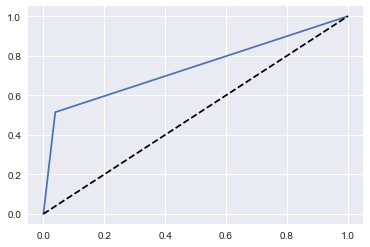

In [240]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

In [241]:
auc(fpr, tpr)
# not bad, but not super good
# aim for better than 80%

0.73793771612027359

## Random over-sampling

In [81]:
from imblearn.over_sampling import RandomOverSampler

In [148]:
ros = RandomOverSampler(random_state=12, ratio=1.0)
x_train_res, y_train_res = ros.fit_sample(X_train, y_train)

In [149]:
clf = rfc.fit(x_train_res, y_train_res)
predictions = clf.predict(X_test)
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.95      0.57      0.95      0.75      0.58      9116
          1       0.60      0.57      0.95      0.58      0.75      0.54      1181

avg / total       0.90      0.91      0.61      0.91      0.75      0.58     10297



In [150]:
print(confusion_matrix(y_test, predictions))

[[8658  458]
 [ 506  675]]


In [151]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

In [152]:
auc(fpr, tpr)

0.7606541001872934

# Random under-sampling

In [88]:
from imblearn.under_sampling import RandomUnderSampler

In [164]:
ros = RandomUnderSampler(random_state=12, ratio=1.0)
x_train_res, y_train_res = ros.fit_sample(X_train, y_train)

In [165]:
clf = rfc.fit(x_train_res, y_train_res)
predictions = clf.predict(X_test)
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.86      0.90      0.92      0.66      0.47      9116
          1       0.45      0.90      0.86      0.60      0.66      0.42      1181

avg / total       0.92      0.86      0.89      0.88      0.66      0.46     10297



In [166]:
print(confusion_matrix(y_test, predictions))

[[7811 1305]
 [ 120 1061]]


In [167]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

In [168]:
auc(fpr, tpr)

0.87761815070338134

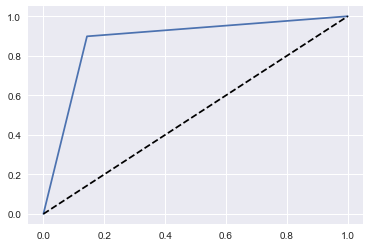

In [169]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

# Near Miss Sampling

In [170]:
from imblearn.under_sampling import NearMiss

In [195]:
ros = NearMiss(random_state=12, ratio=1.0, version=1)
x_train_res, y_train_res = ros.fit_sample(X_train, y_train)

In [196]:
clf = rfc.fit(x_train_res, y_train_res)
predictions = clf.predict(X_test)
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.82      0.83      0.89      0.60      0.38      9116
          1       0.37      0.83      0.82      0.51      0.60      0.34      1181

avg / total       0.90      0.82      0.83      0.85      0.60      0.38     10297



In [197]:
print(confusion_matrix(y_test, predictions))

[[7451 1665]
 [ 204  977]]


In [198]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

In [199]:
auc(fpr, tpr)

0.82230956615625728